In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix

## Introduction


## 1. Data Exploration and Preprocessing

In [2]:
df = pd.read_csv('dataset_diabetes/diabetic_data.csv')
df.head()

def get_column_values(col):
    my_set = set()
    for value in df[col]:
        my_set.add(value)
    return my_set

print(get_column_values("admission_type_id"))
print(df.shape)
df.describe()

{1, 2, 3, 4, 5, 6, 7, 8}
(101766, 50)


,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


The dataset has the following features:

* encounter_id: (Number)
آیدی منحصر به فرد ویزیت با هر بیمار

* patient_nbr: (Number)
آیدی منحصر به فرد هر بیمار

* race: (Categorical)
نژاد فرد
[Caucasian, African American, Hispanic, Asian, Other]

* gender: (Categorical)
جنسیت فرد
[Female, Male, Unknown/Invalid]

* age: [x, y)
سن فرد در بازه های 10 ساله

* weight: [x, y)
وزن بیمار در بازه های 25 تایی

* admission_type_id: (Categorical)
نوع پذیرش که شامل 8 حالت مختلف است.

* discharge_disposition_id: (Categorical)
نوع ترخیص که شامل 29 حالت مختلف است.

* admission_source_id: (Categorical)
نوع منبع پذیرش که شامل 21 حالت مختلف است.

* time_in_hospital: (Number)
مدت زمان بستری در بیمارستان به روز

* payer_code: (Categorical)
نوع بیمه سلامت فرد که شامل 23 حالت مختلف است.

* medical_specialty: (Categorical)
نوع متخصص که شامل 73 حالت مختلف است.

* num_lab_procedures: (Number)
تعداد تست های آزمایشگاهی گرفته شده

* num_procedures: (Number)
تعداد عمل های انجام شده

* num_medications: (Number)
تعداد دارو های مصرف شده

* number_outpatient: (Number)
تعداد ویزیت های کوتاه

* number_emergency: (Number)
تعداد ویزیت های اورژانسی

* number_inpatient: (Number)
تعداد بستری های بیمار

* diag_1: (ICD-9)
معاینه اول

* diag_2: (ICD-9)
معاینه دوم

* diag_3: (ICD-9)
معاینه سوم

* number_diagnoses: (Number)
تعداد معاینه ها

* max_glu_serum: (Categorical)
مربوط به glucose serum اینکه آیا تست انجام شده یا بازه ای از نتیجه تست
['>200', '>300', 'Norm', 'None']

* A1Cresult: (Categorical)
مربوط به A1C اینکه آیا تست انجام شده یا بازه ای از نتیجه تست
['>7', '>8', 'Norm', 'None']


موارد زیر می گوید که آیا دارو تجویز شده است یا خیر و اینکه دوز آن زیاد شده است یا کمتر
(Categorical)
['Down', 'Up', 'Steady', 'No']
* metformin
* repaglinide
* nateglinide
* chlorpropamide
* glimepiride
* acetohexamide
* glipizide
* tolbutamide
* pioglitazone
* rosiglitazone
* acarbose
* miglitol
* troglitazone
* tolazamide
* examide
* citoglipton
* insulin
* glyburide-metformin
* glipizide-metformin
* glimepiride-pioglitazone
* metformin-rosiglitazone
* metformin-pioglitazone


* change: (Categorical)
آیا دارو های دیابت تغییر کرده اند یا خیر
['Ch', 'No']

* diabetesMed: (Categorical)
آیا داروی دیابتی تجویز شده است یا خیر
['Yes', 'No']

* readmitted: (Categorical)
آیا بیمار پس از 30 روز مجددا در بیمارستان پذیرفته شده است یا نه
['NO', '>30', '<30']

#### Handle missing data

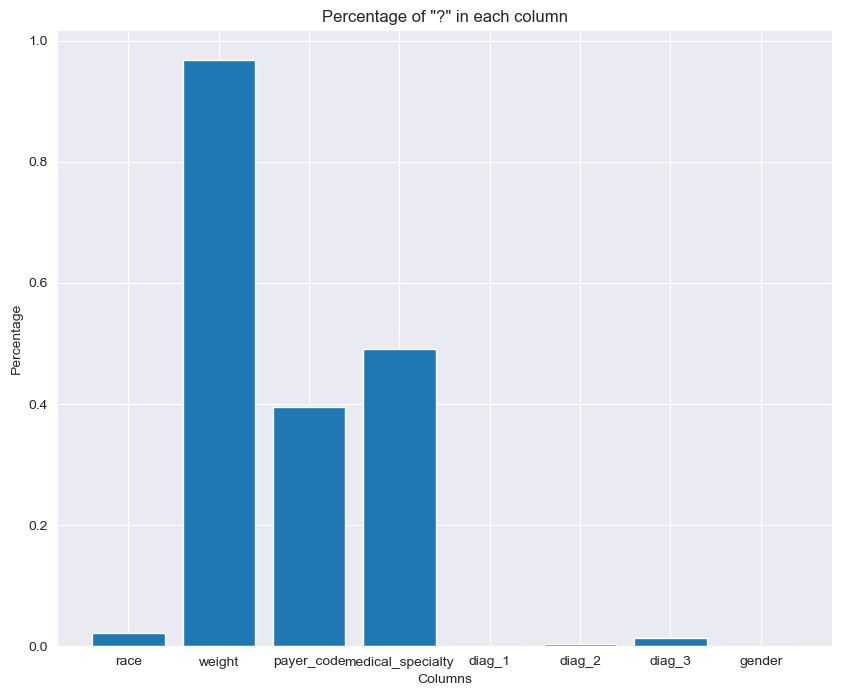

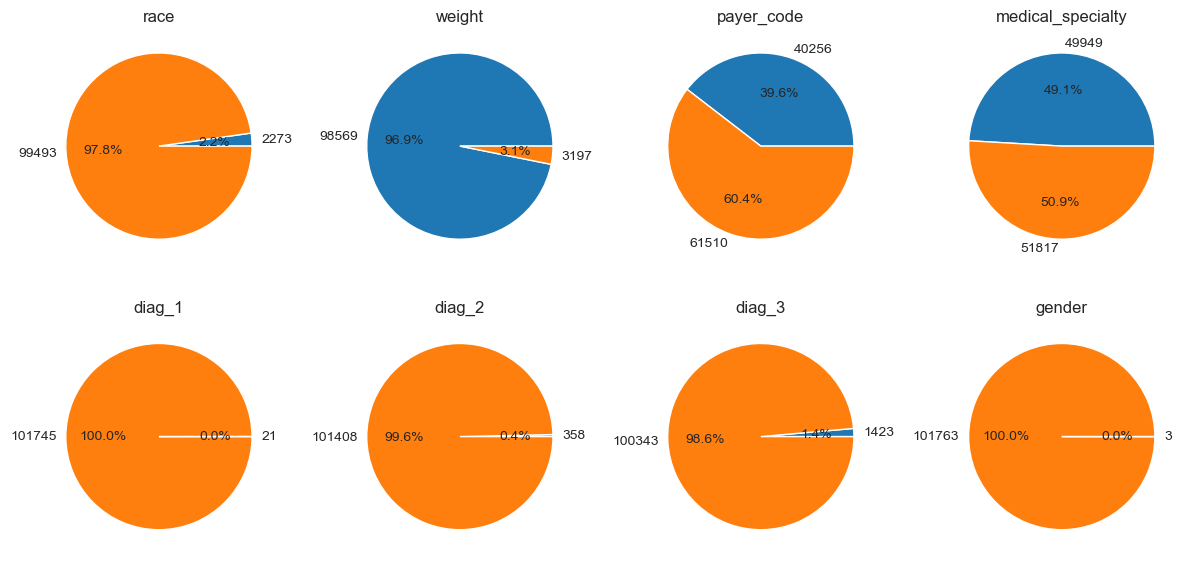

In [3]:
m = df.shape[0]
counts_percent = []
counts = []
cols = []

for col in df.columns:
    count = df[col].astype(str).str.count('\?').sum()
    if count > 0:
        counts_percent.append(count / m)
        cols.append(col)
        counts.append(count)

age_count = df['gender'].astype(str).str.count('Unknown/Invalid').sum()
counts_percent.append(age_count / m)
cols.append('gender')
counts.append(age_count)

plt.figure(figsize=(10, 8))
plt.bar(cols, counts_percent)
plt.title('Percentage of "?" in each column')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.show()

fig, axs = plt.subplots(2, 4, figsize=(12, 6))
axs = axs.flatten()

for i in range(len(cols)):
    axs[i].pie([counts_percent[i], 1 - counts_percent[i]], labels = [counts[i], m - counts[i]], autopct='%1.1f%%')
    axs[i].set_title(cols[i])

plt.tight_layout()
plt.show()

In [4]:
# Categorical Values
races = ["AfricanAmerican", "Other", "Caucasian", "Asian", "Hispanic"]
genders = ["Male", "Female"]

# Drop rows with duplicate patient_nbr
df = df.drop_duplicates(subset='patient_nbr')

# Race
# replace missing with random value of their list
df.loc[df["race"] == "?", "race"] = random.choice(races)
print(get_column_values("race"))

# Gender
# replace missing with random value of their list
df.loc[df["gender"] == "Unknown/Invalid", "gender"] = random.choice(genders)
print(get_column_values("gender"))

# Age
# convert the [x, y) to y
def extract_max(range_str):
    range_str = range_str.strip('[]()')
    range_values = range_str.split('-')
    return range_values[1]

df["age"] = df["age"].apply(extract_max)

# diag 1-2-3
# convert icd9 to their categories based on paper [1]
def icd9_diabetes(icd9):
    if icd9.startswith("250"):
        return "Diabetes"
    elif "V" in icd9 or "E" in icd9:
        return "Other"
    elif "?" in icd9:
        return "No"
    elif 390<=float(icd9)<=459 or icd9 == "785":
        return "Circulatory"
    elif 460<=float(icd9)<=519 or icd9 == "786":
        return "Respiratory"
    elif 520<=float(icd9)<=579 or icd9 == "787":
        return "Digestive"
    elif 800<=float(icd9)<=999:
        return "Injury"
    elif 710<=float(icd9)<=739:
        return "Musculoskeletal"
    elif 580<=float(icd9)<=629 or icd9 == "788":
        return "Genitourinary"
    elif 140<=float(icd9)<=239:
        return "Neoplasms"
    else:
        return "Other"

df["diag_1"] = df["diag_1"].apply(icd9_diabetes)
df["diag_2"] = df["diag_2"].apply(icd9_diabetes)
df["diag_3"] = df["diag_3"].apply(icd9_diabetes)

print(df.shape)

{'Caucasian', 'Hispanic', 'AfricanAmerican', 'Other', 'Asian'}
{'Female', 'Male'}
(71518, 50)


In [5]:
# Convert readmitted to be under 30 days or not
df["readmitted"] = df["readmitted"].replace({">30": 0, "NO": 0, "<30": 1})

# Change column's values to label use in scikit learn trees
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

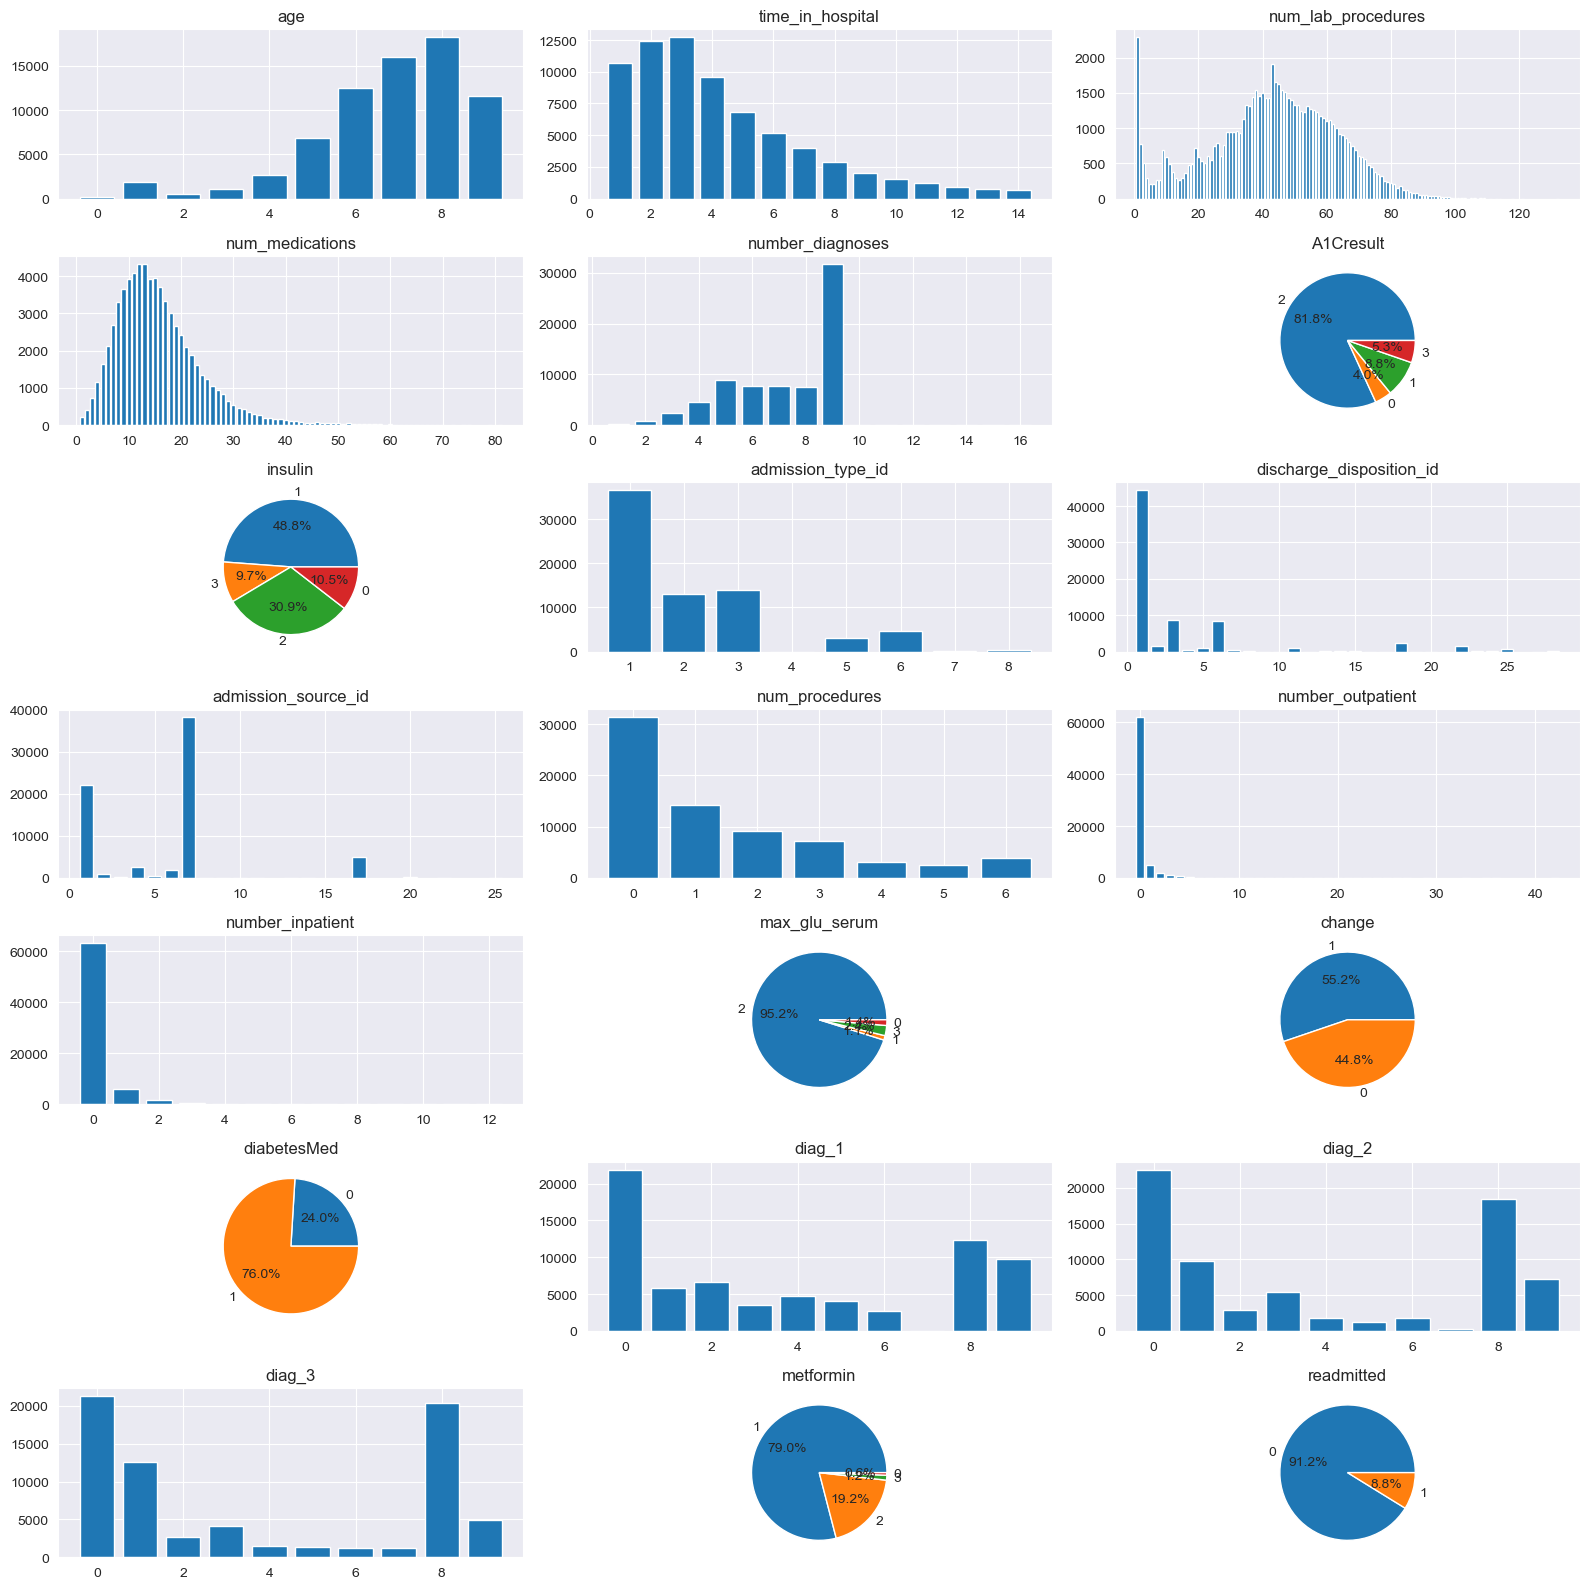

,age,time_in_hospital,num_lab_procedures,num_medications,number_diagnoses,A1Cresult,insulin,admission_type_id,discharge_disposition_id,admission_source_id,...,number_outpatient,number_inpatient,max_glu_serum,change,diabetesMed,diag_1,diag_2,diag_3,metformin,readmitted
0,0,1,41,1,1,2,1,6,25,1,...,0,0,2,1,0,1,7,7,1,0
1,2,3,59,18,9,2,3,1,1,7,...,0,0,2,0,1,8,1,8,1,0
2,3,2,11,13,6,2,1,1,1,7,...,2,1,2,1,1,8,1,8,1,0
3,4,2,44,16,7,2,3,1,1,7,...,0,0,2,0,1,8,1,0,1,0
4,5,1,51,8,5,2,2,1,1,7,...,0,0,2,0,1,6,6,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,8,9,50,33,9,0,2,1,1,7,...,0,0,2,0,1,2,2,1,1,0
101755,5,14,73,26,9,1,3,1,1,7,...,0,0,2,0,1,3,3,9,1,0
101756,7,2,46,17,9,2,2,1,1,7,...,1,1,2,1,1,4,3,0,1,0
101758,9,5,76,22,9,2,3,1,1,7,...,0,0,2,0,1,8,8,8,1,0


In [6]:
# Selecting columns
cols = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses', 'A1Cresult', 'insulin', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'num_procedures', 'number_outpatient', 'number_inpatient', 'max_glu_serum', 'change', 'diabetesMed', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'readmitted']

df = df[cols]

def count_items(column_name):
    item_count = {}
    for item in df[column_name]:
        if item in item_count:
            item_count[item] += 1
        else:
            item_count[item] = 1
    return item_count

fig, axs = plt.subplots(7, 3, figsize=(16, 16))
axs = axs.flatten()

for i in range(len(cols)):
    count = count_items(cols[i])
    if len(count) > 5:
        axs[i].bar(count.keys(), count.values())
        axs[i].set_title(cols[i])
    else:
        axs[i].pie(count.values(), labels = count.keys(), autopct='%1.1f%%')
        axs[i].set_title(cols[i])

plt.tight_layout()
plt.show()
df

In [7]:
# Group by readmitted to count the number of each category by under 30 days or not

# count = df.groupby('admission_type_id')['readmitted'].value_counts()
count = df.groupby('discharge_disposition_id')['readmitted'].value_counts()
# count = df.groupby('admission_source_id')['readmitted'].value_counts()
count

discharge_disposition_id  readmitted
1                         0             41239
                          1              3078
2                         0              1327
                          1               212
3                         0              7608
                          1              1176
4                         0               485
                          1                56
5                         0               725
                          1               188
6                         0              7500
                          1               789
7                         0               370
                          1                39
8                         0                66
                          1                 7
9                         0                 7
                          1                 2
10                        0                 6
11                        0              1077
12                        0                

##### based on last cell we can try to see how many of the mapped values have the same readmitted, or even there are some columns with same meaning.
##### so we can re categorize them into new categorizes:

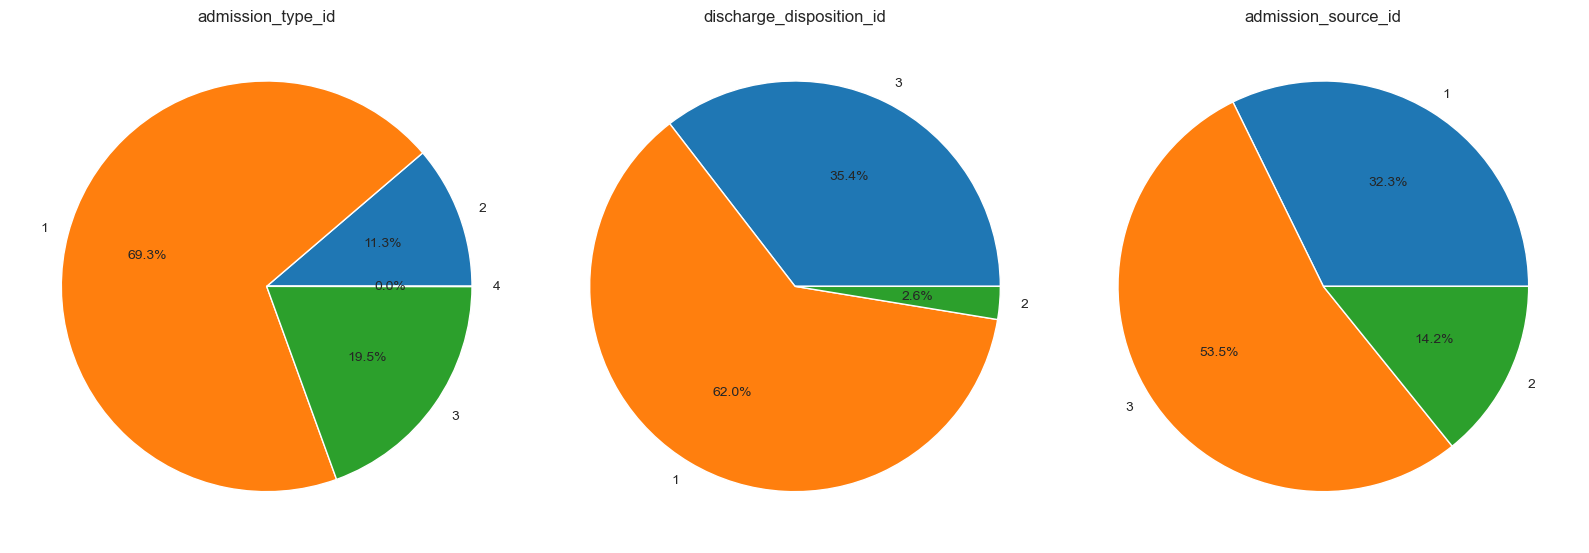

In [8]:
# create map dictionary for replace
def create_map_dic(categories):
    mapping = {}
    for k, v in categories.items():
        for val in v:
            mapping[val] = k
    return mapping

'''
categorize the admission_type_id into 4 category out of 8
some values have the same meaning like urgent=emergency or null=not available
"Emergency" 1 : {1, 2, 7}
"Other" 2 : {5, 6, 8}
"Elective" 3 : {3}
"Newborn" 4 : {4}
'''
categories = {1: [1, 2, 7], 2: [5, 6, 8], 3: [3], 4: [4]}
df['admission_type_id'] = df['admission_type_id'].replace(create_map_dic(categories))

'''
categorize the discharge_disposition_id into 3 category out of 29
some values are already mostly 0, so we put those in a column
home column has the most values so we separate it from others too
"Home" 1 : {1}
"No readmitted" 2 : {10, 11, 13, 14, 16, 17, 19, 20, 23, 24, 27}
"Other" 3 : {2, 3, 4, 5, 6, 7, 8, 9, 12, 15, 18, 21, 22, 25, 26, 28, 29}
'''
categories = {1: [1], 2: [10, 11, 13, 14, 16, 17, 19, 20, 23, 24, 27], 3: [2, 3, 4, 5, 6, 7, 8, 9, 12, 15, 18, 21, 22, 25, 26, 28, 29]}
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(create_map_dic(categories))

'''
categorize the admission_source_id into 3 category out of 26
"Referral" 1 : {1, 2, 3}
"Other" 2 : {4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}
"Emergency" 3 : {7}
'''
categories = {1: [1, 2, 3], 2: [4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26], 3: [7]}
df['admission_source_id'] = df['admission_source_id'].replace(create_map_dic(categories))

fig, axs = plt.subplots(1, 3, figsize=(16, 16))
axs = axs.flatten()

map_cols = ["admission_type_id", "discharge_disposition_id", "admission_source_id"]
for i in range(len(map_cols)):
    count = count_items(map_cols[i])
    axs[i].pie(count.values(), labels = count.keys(), autopct = '%1.1f%%')
    axs[i].set_title(map_cols[i])

plt.tight_layout()
plt.show()

##### now we get the correlation of the features and only keep the most important ones:

[0, 1, 2, 3, 4, 8, 12, 14, 15, 16, 19, 20]
['age' 'time_in_hospital' 'num_lab_procedures' 'num_medications'
 'number_diagnoses' 'discharge_disposition_id' 'number_inpatient' 'change'
 'diabetesMed' 'diag_1' 'metformin' 'readmitted']


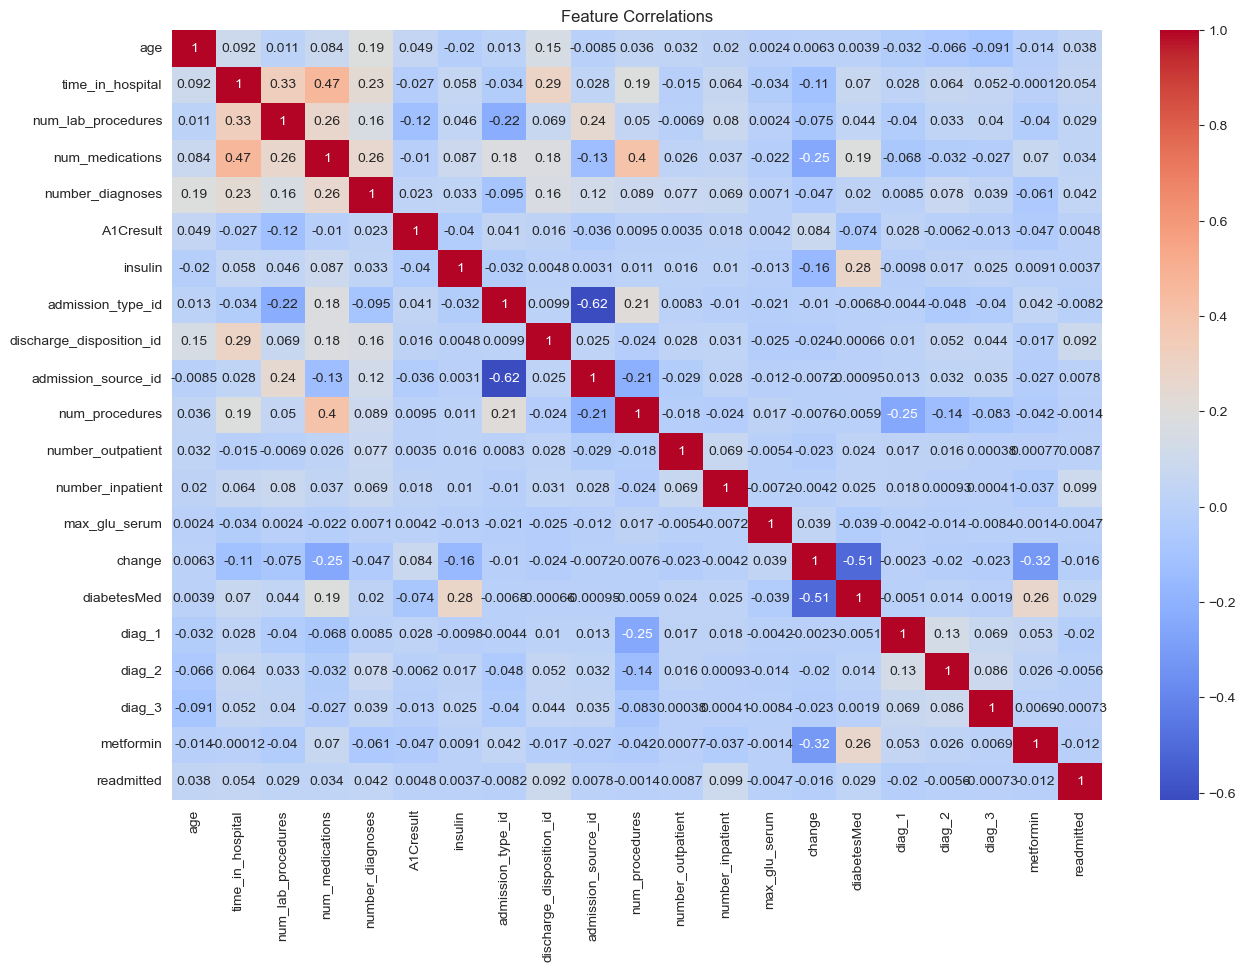

In [9]:
correlations = df.corr()
absolute_correlations = correlations['readmitted'].abs()
# print(absolute_correlations)

features_index = np.where(absolute_correlations > 0.01)
features_index = np.array(features_index).tolist()[0]
print(features_index)

features = df.columns.values[features_index]
print(features)

plt.figure(figsize=(15, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

##### Now we are down to 12 features to try our model on them

In [10]:
cols = features
# ['age', 'time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses', 'discharge_disposition_id', 'number_inpatient', 'change', 'diabetesMed', 'diag_1', 'metformin', 'readmitted']
print(cols)
df = df[cols]

['age' 'time_in_hospital' 'num_lab_procedures' 'num_medications'
 'number_diagnoses' 'discharge_disposition_id' 'number_inpatient' 'change'
 'diabetesMed' 'diag_1' 'metformin' 'readmitted']


## 2. Model Development

In [11]:
X = df.drop('readmitted', axis = 1)
y = df.readmitted
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Hyper parameters

# max_depth = 50
# min_samples_leaf = 750
# max_leaf_nodes = 25
# n_estimators = 100 # number of trees for random forest

max_depth = None
max_leaf_nodes = None
n_estimators = 100 # number of trees for random forest

# Create decision tree
dt = DecisionTreeClassifier(max_depth = max_depth, max_leaf_nodes = max_leaf_nodes)
dt.fit(X_train, y_train)

# Create random forest
rfc = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, max_leaf_nodes = max_leaf_nodes)
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [12]:
# ------------------------- Accuracy --------------------------
# Make predictions on the training and test data
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)
print("Decision Tree Test Accuracy:", round(accuracy_score(y_test, y_pred_test_dt), 5))
print("Decision Tree Train Accuracy:", round(accuracy_score(y_train, y_pred_train_dt), 5))
print("Decision Tree Precision Test:", round(precision_score(y_test, y_pred_test_dt, zero_division = 0), 5))
print("Decision Tree Precision Train:", round(precision_score(y_train, y_pred_train_dt, zero_division = 0), 5))
print("Decision Tree Recall Test:", round(recall_score(y_test, y_pred_test_dt), 5))
print("Decision Tree Recall Train:", round(recall_score(y_train, y_pred_train_dt), 5))
print("Decision Tree F1-score Test:", round(f1_score(y_test, y_pred_test_dt), 5))
print("Decision Tree F1-score Train:", round(f1_score(y_train, y_pred_train_dt), 5))
print("Decision Tree Confusion Matrix:", confusion_matrix(y_test, y_pred_test_dt))


y_pred_train_rfc = rfc.predict(X_train)
y_pred_test_rfc = rfc.predict(X_test)
print("Random Forest Test Accuracy:", round(accuracy_score(y_test, y_pred_test_rfc), 5))
print("Random Forest Train Accuracy:", round(accuracy_score(y_train, y_pred_train_rfc), 5))
print("Random Forest Precision Test:", round(precision_score(y_test, y_pred_test_rfc, zero_division = 0), 5))
print("Random Forest Precision Train:", round(precision_score(y_train, y_pred_train_rfc, zero_division = 0), 5))
print("Random Forest Recall Test:", round(recall_score(y_test, y_pred_test_rfc), 5))
print("Random Forest Recall Train:", round(recall_score(y_train, y_pred_train_rfc), 5))
print("Random Forest F1-score Test:", round(f1_score(y_test, y_pred_test_rfc), 5))
print("Random Forest F1-score Train:", round(f1_score(y_train, y_pred_train_rfc), 5))
print("Random Forest Confusion Matrix:", confusion_matrix(y_test, y_pred_test_rfc))

Decision Tree Test Accuracy: 0.82529
Decision Tree Train Accuracy: 0.99953
Decision Tree Precision Test: 0.11344
Decision Tree Precision Train: 1.0
Decision Tree Recall Test: 0.14779
Decision Tree Recall Train: 0.99465
Decision Tree F1-score Test: 0.12836
Decision Tree F1-score Train: 0.99732
Decision Tree Confusion Matrix: [[11621  1438]
 [ 1061   184]]
Random Forest Test Accuracy: 0.911
Random Forest Train Accuracy: 0.99949
Random Forest Precision Test: 0.11111
Random Forest Precision Train: 0.9992
Random Forest Recall Test: 0.00321
Random Forest Recall Train: 0.99505
Random Forest F1-score Test: 0.00625
Random Forest F1-score Train: 0.99712
Random Forest Confusion Matrix: [[13027    32]
 [ 1241     4]]


##### we can see that our model is overfitting on training data. the f1-score is almost 1 in training but very low on our test data.
##### now lets try to find less but better subset of these features to have the maximum f1-score

##### Note: the code below can run around 5-15 minutes. if you wish to run it uncomment the commented lines. the result is already written below it.

In [21]:
from itertools import combinations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

def calculate_f1_score_decision_tree(features):
    X_subset = X[list(features)]
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X_subset, y, test_size=0.2)
    model = DecisionTreeClassifier(max_depth = max_depth, max_leaf_nodes = max_leaf_nodes)
    model.fit(X_train1, y_train1)
    y_pred = model.predict(X_test1)

    return f1_score(y_test1, y_pred), accuracy_score(y_test1, y_pred), precision_score(y_test, y_pred, zero_division = 0), recall_score(y_test1, y_pred)

def calculate_f1_score_random_forest(features):
    X_subset = X[list(features)]
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2)
    model = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, max_leaf_nodes = max_leaf_nodes)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred), accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, zero_division = 0), recall_score(y_test, y_pred)

column_combinations = combinations(X.columns, 7)
# print(len(list(column_combinations)))


def find_best_subset_decision_tree():
    max_f1_score = 0
    best_features = []
    accuracy = 0
    precision = 0
    recall = 0
    i = 0
    for combination in column_combinations:
        if i % 25 == 0:
            print('dt iteration: ', i)
        i += 1
        f1, acc, prec, rec = calculate_f1_score_decision_tree(combination)
        if f1 > max_f1_score:
            max_f1_score = f1
            best_features = combination
            accuracy = acc
            precision = prec
            recall = rec

    print("Decision Tree Best features:", best_features)
    print("Decision Tree Max F1 score:", round(max_f1_score, 7))
    print("Decision Tree Accuracy:", round(accuracy, 7))
    print("Decision Tree precision:", round(precision, 7))
    print("Decision Tree recall:", round(recall, 7))

def find_best_subset_random_forest():
    max_f1_score = 0
    best_features = []
    accuracy = 0
    precision = 0
    recall = 0
    i = 0
    for combination in column_combinations:
        if i % 25 == 0:
            print('rfc iteration: ', i)
        i += 1
        f1, acc, prec, rec = calculate_f1_score_random_forest(combination)
        if f1 > max_f1_score:
            max_f1_score = f1
            best_features = combination
            accuracy = acc
            precision = prec
            recall = rec
    print("Random Forest Best features:", best_features)
    print("Random Forest Max F1 score:", round(max_f1_score, 7))
    print("Random Forest Accuracy:", round(accuracy, 7))
    print("Random Forest precision:", round(precision, 7))
    print("Random Forest recall:", round(recall, 7))

#----------------------------------------------------------------
# Uncomment these lines below to find the subset. around (5-15) min each
# find_best_subset_decision_tree()
find_best_subset_random_forest()
#----------------------------------------------------------------

# '''
# Result:
# dt Best features: ('time_in_hospital', 'num_lab_procedures', 'num_medications', 'discharge_disposition_id', 'number_inpatient', 'diag_1', 'metformin')
# dt Max F1 score: 0.12660256410256407
# rfc Best features: ('time_in_hospital', 'num_lab_procedures', 'num_medications', 'discharge_disposition_id', 'change', 'diabetesMed', 'metformin')
# rfc Max F1 score: 0.08039579468150897
# '''

rfc iteration:  0
rfc iteration:  25
rfc iteration:  50
rfc iteration:  75
rfc iteration:  100
rfc iteration:  125
rfc iteration:  150
rfc iteration:  175
rfc iteration:  200
rfc iteration:  225
rfc iteration:  250
rfc iteration:  275
rfc iteration:  300
rfc iteration:  325
Random Forest Best features: ('age', 'num_lab_procedures', 'number_diagnoses', 'discharge_disposition_id', 'diabetesMed', 'diag_1', 'metformin')
Random Forest Max F1 score: 0.0793466
Random Forest Accuracy: 0.8896812
Random Forest precision: 0.1481481
Random Forest recall: 0.0541833


In [33]:
cols_dt = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'discharge_disposition_id', 'number_inpatient', 'diag_1', 'metformin', 'readmitted']
cols_rfc = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'discharge_disposition_id', 'change', 'diabetesMed', 'metformin', 'readmitted']
df_dt = df[cols_dt]
df_rfc = df[cols_rfc]

X_dt = df_dt.drop('readmitted', axis = 1)
y_dt = df_dt.readmitted
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size = 0.2)

X_rfc = df_rfc.drop('readmitted', axis = 1)
y_rfc = df_rfc.readmitted
X_train_rfc, X_test_rfc, y_train_rfc, y_test_rfc = train_test_split(X_rfc, y_rfc, test_size = 0.2)


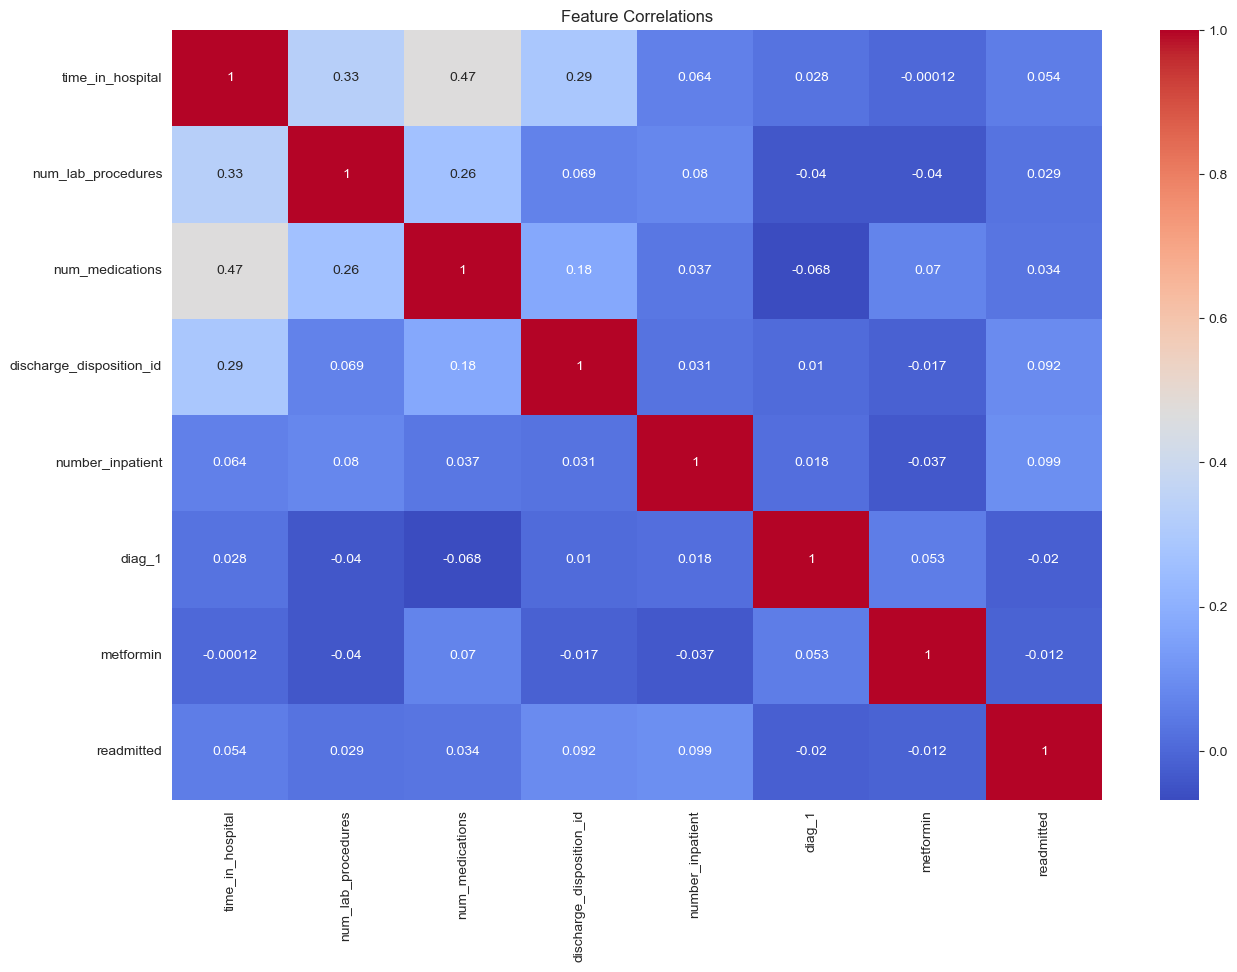

In [34]:
correlations = df_dt.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

## 3. Model Evaluation and Interpretation

##### Now we need to find the best hyperparameters for our models. the code below can take around (15-30) minutes to run

In [35]:
# # Define the values for max_depth, max_leaf_nodes, and n_estimators
# max_depth_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
# max_leaf_nodes_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
# n_estimators_values = [50, 100, 150, 200, 250]
#
# # Create empty lists to store the model performance metrics for each parameter combination
# accuracy_test_dt_values = []
# accuracy_train_dt_values = []
# precision_dt_values = []
# recall_dt_values = []
# f1_score_dt_values = []
#
# accuracy_test_rfc_values = []
# accuracy_train_rfc_values = []
# precision_rfc_values = []
# recall_rfc_values = []
# f1_score_rfc_values = []
#
# x_dt_values = []
# x_rf_values = []
#
# # Iterate over the parameter combinations
#
# for max_leaf_nodes in max_leaf_nodes_values:
#     for max_depth in max_depth_values:
#         # Create decision tree
#         dt = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
#         dt.fit(X_train_dt, y_train_dt)
#
#         x_dt_values.append(f"{max_depth} max_depth, {max_leaf_nodes} max_leaf_nodes")
#         # Calculate model metrics
#         y_pred_test_dt = dt.predict(X_test_dt)
#         accuracy_test_dt = accuracy_score(y_test_dt, y_pred_test_dt)
#         accuracy_test_dt_values.append(round(accuracy_test_dt))
#         precision_dt = precision_score(y_test_dt, y_pred_test_dt, zero_division=0)
#         precision_dt_values.append(precision_dt)
#         recall_dt = recall_score(y_test_dt, y_pred_test_dt)
#         recall_dt_values.append(recall_dt)
#         f1_score_dt = f1_score(y_test_dt, y_pred_test_dt)
#         f1_score_dt_values.append(f1_score_dt)
#
#         for n_estimators in n_estimators_values:
#             print("max_depth", max_depth, "max_leaf_nodes", max_leaf_nodes, "n_estimators", n_estimators)
#             x_rf_values.append(f"{max_depth} max_depth, {max_leaf_nodes} max_leaf_nodes, {n_estimators} n_estimators")
#             # Create random forest
#             rfc = RandomForestClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
#             rfc.fit(X_train_rfc, y_train_rfc)
#
#             # Calculate model metrics
#             y_pred_test_rfc = rfc.predict(X_test_rfc)
#             accuracy_test_rfc = accuracy_score(y_test_rfc, y_pred_test_rfc)
#             accuracy_test_rfc_values.append(accuracy_test_rfc)
#             precision_rfc = precision_score(y_test_rfc, y_pred_test_rfc, zero_division=0)
#             precision_rfc_values.append(precision_rfc)
#             recall_rfc = recall_score(y_test_rfc, y_pred_test_rfc)
#             recall_rfc_values.append(recall_rfc)
#             f1_score_rfc = f1_score(y_test_rfc, y_pred_test_rfc)
#             f1_score_rfc_values.append(f1_score_rfc)
#
# # Create subplots for each model performance metric
# fig, axes = plt.subplots(2, 4, figsize=(15, 10))
#
# # Test Accuracy
# sns.heatmap(pd.DataFrame(accuracy_test_dt_values).values.reshape(len(max_depth_values), len(max_leaf_nodes_values)),
#             annot=True, cmap='coolwarm', xticklabels=max_leaf_nodes_values, yticklabels=max_depth_values, ax=axes[0, 0])
# axes[0, 0].set_title('Decision Tree Test Accuracy')
#
# sns.heatmap(pd.DataFrame(accuracy_test_rfc_values).values.reshape(len(max_depth_values), len(max_leaf_nodes_values)),
#             annot=True, cmap='coolwarm', xticklabels=max_leaf_nodes_values, yticklabels=max_depth_values, ax=axes[1, 0])
# axes[1, 0].set_title('Random Forest Test Accuracy')
#
# # Precision
# sns.heatmap(pd.DataFrame(precision_dt_values).values.reshape(len(max_depth_values), len(max_leaf_nodes_values)),
#             annot=True, cmap='coolwarm', xticklabels=max_leaf_nodes_values, yticklabels=max_depth_values, ax=axes[0, 1])
# axes[0, 1].set_title('Decision Tree Precision')
#
# sns.heatmap(pd.DataFrame(precision_rfc_values).values.reshape(len(max_depth_values), len(max_leaf_nodes_values)),
#             annot=True, cmap='coolwarm', xticklabels=max_leaf_nodes_values, yticklabels=max_depth_values, ax=axes[1, 1])
# axes[1, 1].set_title('Random Forest Precision')
#
# # Recall
# sns.heatmap(pd.DataFrame(recall_dt_values).values.reshape(len(max_depth_values), len(max_leaf_nodes_values)),
#             annot=True, cmap='coolwarm', xticklabels=max_leaf_nodes_values, yticklabels=max_depth_values, ax=axes[0, 2])
# axes[0, 2].set_title('Decision Tree Recall')
#
# sns.heatmap(pd.DataFrame(recall_rfc_values).values.reshape(len(max_depth_values), len(max_leaf_nodes_values)),
#             annot=True, cmap='coolwarm', xticklabels=max_leaf_nodes_values, yticklabels=max_depth_values, ax=axes[1, 2])
# axes[1, 2].set_title('Random Forest Recall')
#
# # F1 score
# sns.heatmap(pd.DataFrame(f1_score_dt_values).values.reshape(len(max_depth_values), len(max_leaf_nodes_values)),
#             annot=True, cmap='coolwarm', xticklabels=max_leaf_nodes_values, yticklabels=max_depth_values, ax=axes[0, 3])
# axes[0, 3].set_title('Decision Tree F1 score')
#
# sns.heatmap(pd.DataFrame(f1_score_rfc_values).values.reshape(len(max_depth_values), len(max_leaf_nodes_values)),
#             annot=True, cmap='coolwarm', xticklabels=max_leaf_nodes_values, yticklabels=max_depth_values, ax=axes[1, 3])
# axes[1, 3].set_title('Random Forest F1 score')
#
# # Adjust the layout
# plt.tight_layout()
#
# # Show the plot
# plt.show()

In [36]:
# plt.figure(figsize=(30, 15))
# plt.plot(x_dt_values, accuracy_test_dt_values, label='Accuracy')
# plt.plot(x_dt_values, recall_dt_values, label='Recall')
# plt.plot(x_dt_values, precision_dt_values, label='Precision')
# plt.plot(x_dt_values, f1_score_dt_values, label='F1 score')
#
#
# # Add labels and title
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.title('Decision tree')
# plt.xticks(rotation='vertical')
#
# # Add legend
# plt.legend()
#
# # Adjust spacing
# plt.tight_layout()
# # Show the plot
# plt.show()
#
# plt.figure(figsize=(200, 15))
# plt.plot(x_rf_values, accuracy_test_rfc_values, label='Accuracy')
# plt.plot(x_rf_values, recall_rfc_values, label='Recall')
# plt.plot(x_rf_values, precision_rfc_values, label='Precision')
# plt.plot(x_rf_values, f1_score_rfc_values, label='F1 score')
#
#
# # Add labels and title
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.title('Random forest')
# plt.xticks(rotation='vertical')
#
# # Add legend
# plt.legend()
#
# # Adjust spacing
# plt.tight_layout()
# # Show the plot
# plt.show()